In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import hausdorff_distance, hausdorff_pair

In [1]:
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial.distance import directed_hausdorff

The Hausdorff distance is the maximum distance between any point on
`image_a` and its nearest point on `image_b`, 
and vice-versa. The function calculates forward and backward mean distances and returns the largest of the two.

Since HD is a measure of dissimilarity (larger HD means less similar), it's important to understand how to interpret its values.

Here's a breakdown:

Zero HD: A Hausdorff distance of 0 means the two sets of points (or shapes) are identical.  Every point in set A is also in set B, and vice-versa.

Small HD: A small HD indicates that the two sets are "close" or "similar."  All points in set A are near some point in set B, and all points in set B are near some point in set A.  The smaller the value, the more similar the sets.

Large HD: A large HD means the sets are "dissimilar."  There are points in set A that are far away from any point in set B, or vice-versa.

Units: The HD's units are the same as the units of your point coordinates (e.g., pixels if you're working with images, meters if you're working with real-world distances).  This is crucial for interpretation.  An HD of 5 pixels is very different from an HD of 5 meters!

Context is Key: The most important thing is to interpret the HD in the context of your application.  What constitutes a "small" or "large" HD depends entirely on what you're measuring and what your goals are.

Image Matching: If you're comparing two nearly identical images, an HD of 2-3 pixels might be considered large.

In [3]:
# Image coordinates are (row, col) or (y, x), NOT (x, y)
point_a = (3, 0) 
point_b = (6, 0)

# Shape chosen to accommodate both point_a and point_b
shape = (7, 1) 

# Generate images, apply above identical shape to both arrs
image_a = np.zeros(shape, dtype=bool) 
image_a[:] = False # Explicitly set all pixels to False (black)
image_b = np.zeros(shape, dtype=bool)
image_b[:] = False # Explicitly set all pixels to False (black)

image_a[point_a] = True # turning on single pixel (3, 0) within ALL-BLACK img_a
image_b[point_b] = True # turning on single pixel (6, 0) within ALL-BLACK img_b

hd = hausdorff_distance(image_a, image_b) # HD with default method: 'standard'
print(f"Hausdorff distance: {hd}") #  "Euclidean Distance" between coordinates of non-zero pixels in image_a and image_b

NameError: name 'np' is not defined

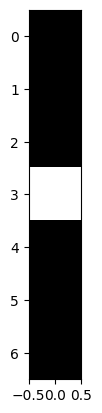

In [ ]:
plt.imshow(image_a, cmap='gray')

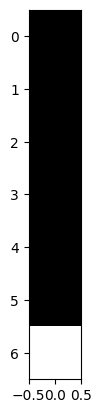

In [ ]:
plt.imshow(image_b, cmap='gray')

In [ ]:
# Test with a different shape
shape2 = (10, 5)
image_a2 = np.zeros(shape2, dtype=bool)
image_a2[:] = False
image_b2 = np.zeros(shape2, dtype=bool)
image_b2[:] = False
image_a2[point_a] = True
image_b2[point_b] = True

hd2 = hausdorff_distance(image_a2, image_b2)
print(f"Hausdorff distance with shape {shape2}: {hd2}")

Hausdorff distance with shape (10, 5): 3.0


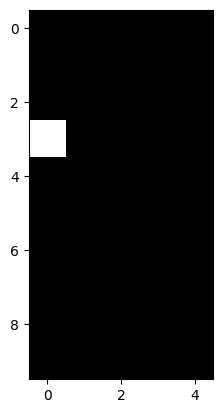

In [ ]:
plt.imshow(image_a2, cmap='gray')

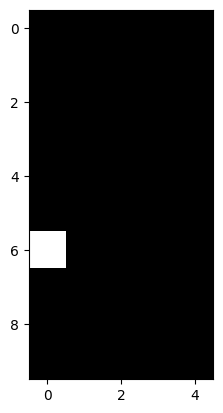

In [ ]:
plt.imshow(image_b2, cmap='gray')

In [ ]:
# Example with points closer together
point_c = (4, 2) # try other coordinates e.g. (4, 0)
image_c = np.zeros(shape2, dtype=bool) # try other shapes e.g. early initialized 'shape'
image_c[:] = False
image_c[point_c] = True
hd_ac = hausdorff_distance(image_a, image_c)
print(f"Hausdorff distance between a and c: {hd_ac}")

Hausdorff distance between a and c: 2.23606797749979


In [ ]:
hp = hausdorff_pair(image_a, image_c) # return the two initial points' original coordinates (reverse eng.)
hp 

(array([3, 0]), array([4, 2]))

In [ ]:
mhd = hausdorff_distance(image_a, image_b, method='modified') # computes MHD
mhd

np.float64(3.0)

In [ ]:
dhd = directed_hausdorff(image_a, image_b) # Scipy requires the points to be represented as ARRAYS OF COORDINATES
print(dhd) # NOTE: different result due to boolean (non-arrays) img_a, img_b 
print(len(dhd))

(0.0, 4, 1)
3


In [ ]:
point_d = (3, 4)
point_e = (6, 2)
shape = (7, 7)

image_1 = np.zeros(shape, dtype=bool)
image_1[point_d] = True

image_2 = np.zeros(shape, dtype=bool)
image_2[point_e] = True

# Extract coordinates of True pixels
coords_d = np.argwhere(image_1)  # Returns [[3, 0]]
coords_e = np.argwhere(image_2)  # Returns [[6, 0]]

# directed_hausdorff expects 2D arrays where each ROW is a point
# Reshape if necessary (it often is for single-point sets)
coords_d = coords_d.reshape(-1, 2)  # Ensures it's a 2D array: [[3, 0]]
coords_e = coords_e.reshape(-1, 2)  # Ensures it's a 2D array: [[6, 0]]


dhd_d_to_e = directed_hausdorff(coords_d, coords_e)
dhd_e_to_d = directed_hausdorff(coords_e, coords_d)

print(f"Directed Hausdorff distance from a to b: {dhd_d_to_e}")
print(f"Directed Hausdorff distance from b to a: {dhd_e_to_d}")

hd = max(dhd_d_to_e, dhd_e_to_d)
print(f"Hausdorff distance: {hd}")

Directed Hausdorff distance from a to b: (3.605551275463989, 0, 0)
Directed Hausdorff distance from b to a: (3.605551275463989, 0, 0)
Hausdorff distance: (3.605551275463989, 0, 0)


In [ ]:
coords_a = np.array([[1, 1], [2, 2], [3, 3]])
coords_b = np.array([[4, 4], [5, 5], [6, 6]])
dir_hd = directed_hausdorff(coords_b, coords_a)
dir_hd

(4.242640687119285, 2, 2)

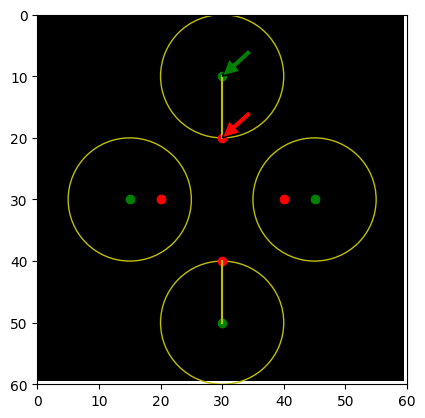

In [7]:
shape = (60, 60)
image = np.zeros(shape)

# Create a diamond-like shape where the four corners form the 1st set of points
x_diamond = 30
y_diamond = 30
r = 10

fig, ax = plt.subplots()
plt_x = [0, 1, 0, -1]
plt_y = [1, 0, -1, 0]

set_ax = [(x_diamond + r * x) for x in plt_x]
set_ay = [(y_diamond + r * y) for y in plt_y]
plt.plot(set_ax, set_ay, 'or')

# Create a kite-like shape where the four corners form the 2nd set of points
x_kite = 30
y_kite = 30
x_r = 15
y_r = 20

set_bx = [(x_kite + x_r * x) for x in plt_x]
set_by = [(y_kite + y_r * y) for y in plt_y]
plt.plot(set_bx, set_by, 'og')

# Set up the data to compute the Hausdorff distance
coords_a = np.zeros(shape, dtype=bool)
coords_b = np.zeros(shape, dtype=bool)
for x, y in zip(set_ax, set_ay):
    coords_a[(x, y)] = True

for x, y in zip(set_bx, set_by):
    coords_b[(x, y)] = True

# Call the Hausdorff function on the coordinates
hausdorff_distance(coords_a, coords_b)
hausdorff_point_a, hausdorff_point_b = hausdorff_pair(coords_a, coords_b)

# Plot the lines that shows the length of the Hausdorff distance
x_line = [30, 30]
y_line = [20, 10]
plt.plot(x_line, y_line, 'y')

x_line = [30, 30]
y_line = [40, 50]
plt.plot(x_line, y_line, 'y')

# Plot circles to show that at this distance, the Hausdorff distance can
# travel to its nearest neighbor (in this case, from the kite to diamond)
ax.add_artist(plt.Circle((30, 10), 10, color='y', fill=None))
ax.add_artist(plt.Circle((30, 50), 10, color='y', fill=None))
ax.add_artist(plt.Circle((15, 30), 10, color='y', fill=None))
ax.add_artist(plt.Circle((45, 30), 10, color='y', fill=None))

# Annotate the returned pair of points that are Hausdorff distance apart
ax.annotate(
    'a',
    xy=hausdorff_point_a,
    xytext=(35, 15),
    arrowprops=dict(facecolor='red', shrink=0.005),
)
ax.annotate(
    'b',
    xy=hausdorff_point_b,
    xytext=(35, 5),
    arrowprops=dict(facecolor='green', shrink=0.005),
)

ax.imshow(image, cmap=plt.cm.gray)
ax.axis((0, 60, 60, 0))
plt.show()